Iteration 1, loss = 0.68217453
Iteration 2, loss = 0.66165764
Iteration 3, loss = 0.64535797
Iteration 4, loss = 0.63231911
Iteration 5, loss = 0.62153003
Iteration 6, loss = 0.61374681
Iteration 7, loss = 0.60871631
Iteration 8, loss = 0.60476825
Iteration 9, loss = 0.60078853
Iteration 10, loss = 0.59838970
Iteration 11, loss = 0.59575254
Iteration 12, loss = 0.59284718
Iteration 13, loss = 0.58962832
Iteration 14, loss = 0.58618174
Iteration 15, loss = 0.58235601
Iteration 16, loss = 0.57831949
Iteration 17, loss = 0.57420073
Iteration 18, loss = 0.57004718
Iteration 19, loss = 0.56582559
Iteration 20, loss = 0.56184178
Iteration 21, loss = 0.55812071
Iteration 22, loss = 0.55482401
Iteration 23, loss = 0.55166058
Iteration 24, loss = 0.54879069
Iteration 25, loss = 0.54627353
Iteration 26, loss = 0.54363291
Iteration 27, loss = 0.54126664
Iteration 28, loss = 0.53875090
Iteration 29, loss = 0.53648381
Iteration 30, loss = 0.53386799
Iteration 31, loss = 0.53205849
Iteration 32, los

C:\Users\larin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.62105204
Iteration 2, loss = 0.61925479
Iteration 3, loss = 0.61776699
Iteration 4, loss = 0.61628189
Iteration 5, loss = 0.61499463
Iteration 6, loss = 0.61379528
Iteration 7, loss = 0.61264766
Iteration 8, loss = 0.61154545
Iteration 9, loss = 0.61041128
Iteration 10, loss = 0.60935764
Iteration 11, loss = 0.60839585
Iteration 12, loss = 0.60732514
Iteration 13, loss = 0.60644290
Iteration 14, loss = 0.60549030
Iteration 15, loss = 0.60465721
Iteration 16, loss = 0.60373929
Iteration 17, loss = 0.60289879
Iteration 18, loss = 0.60203130
Iteration 19, loss = 0.60115452
Iteration 20, loss = 0.60031214
Iteration 21, loss = 0.59945787
Iteration 22, loss = 0.59856111
Iteration 23, loss = 0.59772849
Iteration 24, loss = 0.59682958
Iteration 25, loss = 0.59596934
Iteration 26, loss = 0.59508879
Iteration 27, loss = 0.59427200
Iteration 28, loss = 0.59338768
Iteration 29, loss = 0.59255982
Iteration 30, loss = 0.59174529
Iteration 31, loss = 0.59086808
Iteration 32, los

C:\Users\larin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\larin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


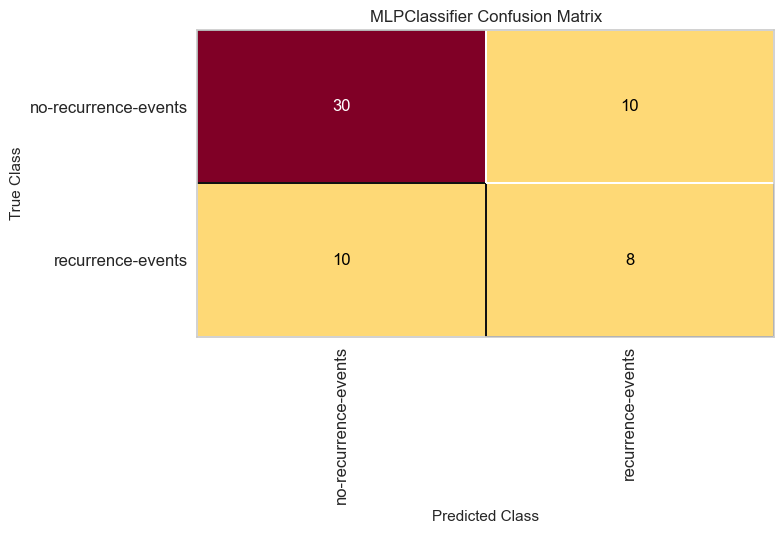

C:\Users\larin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


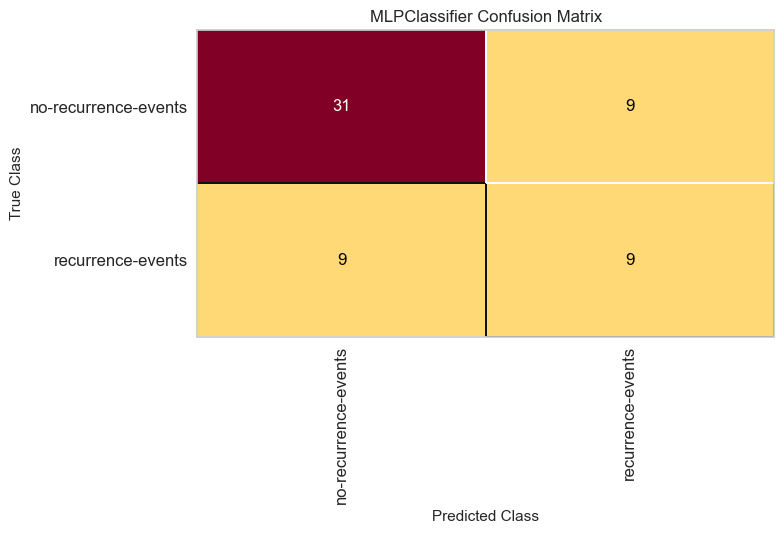

Relatório de Classificação para o Modelo 1:
                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.75      0.75        40
   recurrence-events       0.44      0.44      0.44        18

            accuracy                           0.66        58
           macro avg       0.60      0.60      0.60        58
        weighted avg       0.66      0.66      0.66        58

Relatório de Classificação para o Modelo 2:
                      precision    recall  f1-score   support

no-recurrence-events       0.78      0.78      0.78        40
   recurrence-events       0.50      0.50      0.50        18

            accuracy                           0.69        58
           macro avg       0.64      0.64      0.64        58
        weighted avg       0.69      0.69      0.69        58



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix

# Carregar os dados do arquivo CSV
data = pd.read_csv('breast-cancer.csv')

# Verificar as primeiras linhas para confirmar se os dados foram carregados corretamente
print(data.head())

# Dividir os dados em features (X) e rótulos (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Converter colunas categóricas em variáveis dummy
X = pd.get_dummies(X, drop_first=True)

# Identificação de outliers (opcional, usando Z-score como exemplo)
z_scores = np.abs((X - X.mean()) / X.std())
X = X[(z_scores < 3).all(axis=1)]
y = y[X.index]

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balanceamento dos dados
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Eliminação de redundância usando PCA (opcional)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_res)

# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_pca, y_res, test_size=0.2, random_state=42)

# Definição de hiperparâmetros para Grid Search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50,), (50, 100, 50,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Ajuste automático de hiperparâmetros usando Grid Search
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, n_jobs=-1, cv=3, verbose=2)
grid_search.fit(X_treino, y_treino)

# Melhor modelo obtido pelo Grid Search
best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Avaliação do modelo com melhores hiperparâmetros
previsoes = best_model.predict(X_teste)
precisao = accuracy_score(y_teste, previsoes)
print("Precisão do melhor modelo:", precisao)

# Matriz de confusão e relatório de classificação
cm = ConfusionMatrix(best_model)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)
cm.show()

print("Relatório de Classificação para o Melhor Modelo:")
print(classification_report(y_teste, previsoes))

# Avaliação da relação entre taxa de aprendizado e quantidade de épocas
learning_rates = [0.001, 0.01, 0.1]
epochs = [200, 500, 1000]
for lr in learning_rates:
    for epoch in epochs:
        model = MLPClassifier(max_iter=epoch, learning_rate_init=lr, random_state=42)
        model.fit(X_treino, y_treino)
        preds = model.predict(X_teste)
        acc = accuracy_score(y_teste, preds)
        print(f"Precisão com taxa de aprendizado {lr} e {epoch} épocas: {acc}")
